# ULTIMO PARCIAL MODELOS II

In [12]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Rutas
origen = r'C:\Users\oswal\OneDrive\Documentos\MATLAB\6to SEMESTRE\ok'
destino_train = os.path.join('data', 'train')
destino_val = os.path.join('data', 'val')

# Clases
clases = ['CON TUMOR', 'SIN TUMOR']

# Porcentaje de validación
porcentaje_val = 0.2

# Crear estructura de las fokin carpetas
for clase in clases:
    os.makedirs(os.path.join(destino_train, clase), exist_ok=True)
    os.makedirs(os.path.join(destino_val, clase), exist_ok=True)

    ruta_clase = os.path.join(origen, clase)
    imagenes = [f for f in os.listdir(ruta_clase) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(imagenes)

    n_val = int(len(imagenes) * porcentaje_val)
    imagenes_val = imagenes[:n_val]
    imagenes_train = imagenes[n_val:]

    # Copiar imágenes de entrenamiento
    for img in imagenes_train:
        shutil.copy(
            os.path.join(ruta_clase, img),
            os.path.join(destino_train, clase, img)
        )

    # Copiar imágenes de validación
    for img in imagenes_val:
        shutil.copy(
            os.path.join(ruta_clase, img),
            os.path.join(destino_val, clase, img)
        )

print("Imágenes divididas en conjuntos de entrenamiento y validación.")


Imágenes divididas en conjuntos de entrenamiento y validación.


In [13]:
# Verificación: contar imágenes en cada carpeta
print("\n Conteo de imágenes por carpeta:")
for conjunto, ruta_base in [('Entrenamiento', destino_train), ('Validación', destino_val)]:
    print(f"\n{conjunto}:")
    for clase in clases:
        ruta = os.path.join(ruta_base, clase)
        cantidad = len([f for f in os.listdir(ruta) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f"  {clase}: {cantidad} imágenes")


 Conteo de imágenes por carpeta:

Entrenamiento:
  CON TUMOR: 357 imágenes
  SIN TUMOR: 636 imágenes

Validación:
  CON TUMOR: 178 imágenes
  SIN TUMOR: 315 imágenes


In [9]:

# Parámetros
img_size = (150, 150)
batch_size = 32

# Generadores de datos con aumento para entrenamiento y normalización para validación
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Cargar imágenes desde carpetas
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'data/val',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Modelo CNN simple
def crear_modelo_cnn(num_capas_conv=2):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    for _ in range(num_capas_conv - 1):
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binaria

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [10]:
# Parámetros a probar
epocas_lista = [5, 10]             # Podría ajustar a [5, 10, 20] si mi compu no sonara como lavadora
capas_lista = [1, 2, 3]

# Guardar resultados
resultados = []

for capas in capas_lista:
    for epocas in epocas_lista:
        print(f"\n Entrenando modelo con {capas} capa(s) convolucional(es) y {epocas} época(s)...")
        
        modelo = crear_modelo_cnn(num_capas_conv=capas)
        historia = modelo.fit(
            train_generator,
            epochs=epocas,
            validation_data=val_generator,
            verbose=1
        )
        
        # Últimos valores
        acc = historia.history['accuracy'][-1]
        val_acc = historia.history['val_accuracy'][-1]
        
        resultados.append({
            'capas': capas,
            'epocas': epocas,
            'acc_train': acc,
            'acc_val': val_acc
        })

# Mostrar resultados
print("\n Resultados:")
for r in resultados:
    print(f"{r['capas']} capa(s) | {r['epocas']} época(s) → Acc (train): {r['acc_train']:.2f}, Acc (val): {r['acc_val']:.2f}")



🧪 Entrenando modelo con 1 capa(s) convolucional(es) y 5 época(s)...
Epoch 1/5
25/25 [==============================] - 34s 1s/step - loss: 0.9125 - accuracy: 0.6538 - val_loss: 0.5172 - val_accuracy: 0.7600
Epoch 2/5
25/25 [==============================] - 37s 1s/step - loss: 0.5303 - accuracy: 0.7400 - val_loss: 0.4777 - val_accuracy: 0.7700
Epoch 3/5
25/25 [==============================] - 34s 1s/step - loss: 0.4942 - accuracy: 0.7713 - val_loss: 0.4371 - val_accuracy: 0.7950
Epoch 4/5
25/25 [==============================] - 34s 1s/step - loss: 0.4869 - accuracy: 0.7688 - val_loss: 0.4262 - val_accuracy: 0.7700
Epoch 5/5
25/25 [==============================] - 37s 1s/step - loss: 0.4694 - accuracy: 0.7837 - val_loss: 0.4110 - val_accuracy: 0.8000

🧪 Entrenando modelo con 1 capa(s) convolucional(es) y 10 época(s)...
Epoch 1/10
25/25 [==============================] - 33s 1s/step - loss: 0.9272 - accuracy: 0.6725 - val_loss: 0.5123 - val_accuracy: 0.6450
Epoch 2/10
25/25 [========

In [14]:
import pandas as pd

# Convertir resultados a DataFrame
df_resultados = pd.DataFrame(resultados)

# Guardar a CSV
df_resultados.to_csv('resultados_modelos_brain_tumor.csv', index=False)

print("Resultados guardados en 'resultados_modelos_brain_tumor.csv'")


Resultados guardados en 'resultados_modelos_brain_tumor.csv'


In [16]:
# Predicciones reales y predichas

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener etiquetas verdaderas y predicciones del modelo
val_generator.reset()  # Importante si ya usaste el generador antes

# Número total de imágenes en validación
n_samples = val_generator.samples

# Predicciones del modelo
preds = modelo.predict(val_generator, steps=np.ceil(n_samples / val_generator.batch_size))
y_pred = (preds > 0.5).astype(int).reshape(-1)  # Umbral para binario

y_true = val_generator.classes


7/7 [==============================] - 5s 677ms/step


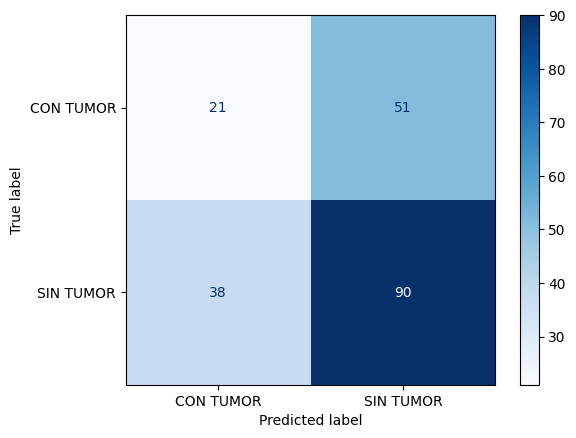

In [17]:
# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=val_generator.class_indices.keys())
disp.plot(cmap='Blues')

### En mi anterior matriz de confusión son solo 200 datos dado a que mi conjunto de validación lo definí como el 20% de mis datos (200 de 1000).

### Conclusión
El empleo de CNN a mi parecer es una excelente herramienta para clasificar imágenes sin la necesidad de complicarnos las cosas extrayendo manualmente la información de estas mismas, por ejemplo, en este caso en particular detecta patrones complejos como podrían ser masas tumorales, asimetrías y bordes, la única limitante que en mi persona encontré (pero creo que es propio del método) es que al usar poquitos datos el método realmente no es muy bueno (eso lo podemos ver en mis métricas, ya que sólo usé 1000 imágenes) pero podría mejorar con más datos, aunado a que puede aplicarse a nuevas imágenes clínicas reales.